In [23]:
import pandas as pd
import numpy as np


In [16]:
#!pip install ar_wordcloud

In [11]:
#pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize 
arabic_stop_words=stopwords.words('arabic')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
reviews = pd.read_csv('reviews.tsv', sep='\t',names =["rating","review_id","user_id","book_id","review"])

In [3]:
reviews.head(2)

,rating,review_id,user_id,book_id,review
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني..."
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...


In [5]:
reviews.shape

(46391, 5)

In [6]:
reviews['rating'].value_counts()

5    17776
4    13798
3     8784
2     3803
1     2230
Name: rating, dtype: int64

<AxesSubplot:ylabel='Frequency'>

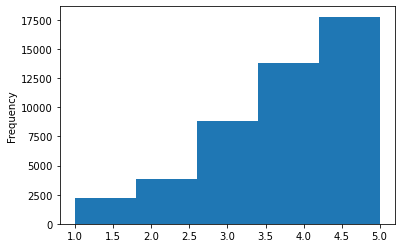

In [8]:
reviews['rating'].plot.hist(bins=5)

In [10]:
import re
# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

In [13]:
!pip install qalsadi
import qalsadi.lemmatizer
lemmer = qalsadi.lemmatizer.Lemmatizer()

def remove_sw(text):
  filtered_sentence=""
  for w in word_tokenize(text):
    w=lemmer.lemmatize_text(w)[0]
    if w not in set(arabic_stop_words):
      filtered_sentence+=w+" "
  return filtered_sentence

     ------------------------------------ 256.4/256.4 kB 583.4 kB/s eta 0:00:00
     -------------------------------------- 51.7/51.7 kB 669.1 kB/s eta 0:00:00
     ------------------------------------ 139.0/139.0 kB 684.9 kB/s eta 0:00:00
     ------------------------------------ 332.6/332.6 kB 573.5 kB/s eta 0:00:00
     ------------------------------------ 353.0/353.0 kB 609.9 kB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 696.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4271 sha256=0d753b1266a73e6d9c43422b3a4ff24cdbd3adf06ddc1a67918827caf3a3a6b7
  Stored in directory: c:\users\emz\appdata\local\pip\cache\wheels\d9\eb\d9\69d8f166b1483ad069ebe839147464a878fa0046a6c13c694c
Successfully built pickledb


In [14]:
from tqdm import tqdm
tqdm.pandas()
reviews["cleaned_text"]=reviews["review"].progress_apply(lambda x:remove_sw(normalize(x)))
reviews.head()

100%|██████████| 46391/46391 [4:03:34<00:00,  3.17it/s]   


,rating,review_id,user_id,book_id,review,cleaned_text
0,4,338670838,7878381,13431841,"""عزازيل الذي صنعناه ،الكامن في أنفسنا"" يذكرني...",عزازيل صنع كامن ذكر يوسف زيد بورخس استخدام حيل...
1,4,39428407,1775679,3554772,من أمتع ما قرأت من روايات بلا شك. وحول الشك ت...,متع قر روايات بلا شك حول شك دندن عزازيل بلا هو...
2,4,32159373,1304410,3554772,رواية تتخذ من التاريخ ،جوًا لها اختار المؤلف ...,روايه تاريخ جو اختار مؤلف فتر تاريخ ندر تناول ...
3,1,442326656,11333112,3554772,إني أقدّر هذه الرواية كثيرا، لسبب مختلف عن أس...,اني قدر الروايه كثير سب مختلف اسباب خر ال انها...
4,5,46492258,580165,3554772,الكاهن الذي أطلق على نفسه اسم هيبا تيمنا بالع...,كاهن طلق علي اسم هيب تيمن بالعالمه الوثنيه هيب...


In [15]:
reviews.to_csv("cleaned_reviews.csv")

In [20]:
from ar_wordcloud import ArabicWordCloud
for label in reviews['rating'].unique():
  text=reviews[reviews['rating']==label]["cleaned_text"]
  print("The most common word with rating "+str(label)+"\n")
  awc = ArabicWordCloud(font='NotoSansArabic-ExtraBold.ttf',  max_font_size=35)
  plt.figure(figsize = (10,10))
  wc_ar = awc.from_text(u''.join(text))
  plt.imshow(wc_ar, cmap=None)
  plt.show()

The most common word with rating 4



AssertionError: بالله أتأكد ان اسم الخط المُدخل صحيح
Please make sure the selected font name is correct!

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
cdf = countvec.fit_transform(reviews['cleaned_text'])


In [24]:
cvec = pd.DataFrame(cdf.toarray(), columns = countvec.get_feature_names())


MemoryError: Unable to allocate 26.2 GiB for an array with shape (46391, 75658) and data type int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cvec, reviews['rating'], test_size=0.3, random_state=42)

NameError: name 'cvec' is not defined

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cdf, reviews['rating'], test_size=0.3, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
naive_model = MultinomialNB()
naive_model = naive_model.fit(X_train, y_train)

In [29]:
y_pred=naive_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
def summarize_model_result(model):
  print("\t\tClassification Report")
  print(classification_report(y_test, y_pred))
  print('\nConfusion Matrix:\n')
  print(confusion_matrix(y_test, y_pred))
  print("----------------------------------------------------------------------------------------------")
  plot_confusion_matrix(model, X_test, y_test, xticks_rotation='vertical')

		Classification Report
              precision    recall  f1-score   support

           1       0.60      0.03      0.05       658
           2       0.39      0.03      0.06      1119
           3       0.35      0.31      0.33      2667
           4       0.38      0.43      0.40      4157
           5       0.56      0.71      0.62      5317

    accuracy                           0.46     13918
   macro avg       0.46      0.30      0.29     13918
weighted avg       0.45      0.46      0.43     13918


Confusion Matrix:

[[  18   28  271  155  186]
 [   6   35  500  377  201]
 [   1   18  825 1049  774]
 [   1    5  505 1771 1875]
 [   4    3  263 1251 3796]]
----------------------------------------------------------------------------------------------


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


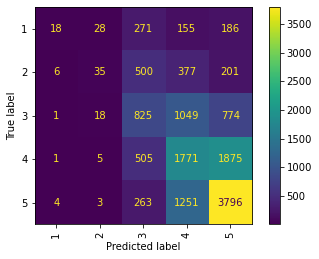

In [31]:
summarize_model_result(naive_model)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_model=RandomForestClassifier(max_depth=20, random_state=0)
dt_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

		Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       658
           2       0.00      0.00      0.00      1119
           3       0.60      0.00      0.00      2667
           4       0.32      0.03      0.05      4157
           5       0.39      0.99      0.56      5317

    accuracy                           0.39     13918
   macro avg       0.26      0.20      0.12     13918
weighted avg       0.36      0.39      0.23     13918


Confusion Matrix:

[[   0    0    1   20  637]
 [   0    0    0   55 1064]
 [   0    0    3  114 2550]
 [   0    0    1  112 4044]
 [   0    0    0   54 5263]]
----------------------------------------------------------------------------------------------


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprec

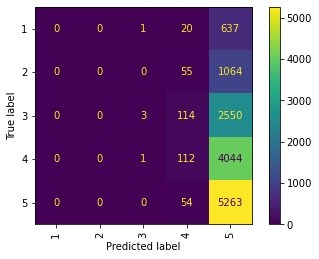

In [35]:
y_pred=rf_model.predict(X_test)
summarize_model_result(dt_model)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth=20, random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, random_state=0)

		Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       658
           2       0.00      0.00      0.00      1119
           3       0.60      0.00      0.00      2667
           4       0.32      0.03      0.05      4157
           5       0.39      0.99      0.56      5317

    accuracy                           0.39     13918
   macro avg       0.26      0.20      0.12     13918
weighted avg       0.36      0.39      0.23     13918


Confusion Matrix:

[[   0    0    1   20  637]
 [   0    0    0   55 1064]
 [   0    0    3  114 2550]
 [   0    0    1  112 4044]
 [   0    0    0   54 5263]]
----------------------------------------------------------------------------------------------


C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EMZ\anaconda3\lib\site-packages\sklearn\utils\deprec

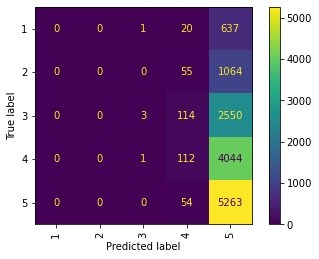

In [33]:
y_pred=rf_model.predict(X_test)
summarize_model_result(rf_model)